<a href="https://colab.research.google.com/github/ArtemRamus/universal_statistical_test/blob/main/one_statistical_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data Scientists Need to Know Just One Statistical Test</h1>

https://towardsdatascience.com/data-scientists-need-to-know-just-one-statistical-test-3115b2ff26fd

After you read this, you will be able to test any possible statistical hypothesis. With a unique algorithm.

<ul>
<li>You have thrown a die 10 times. You got [1, 1, 1, 1, 1, 2, 2, 2, 3, 3]. Is the die loaded?</li>
<li>In a customer satisfaction survey, 100 customers gave an average rating of 3.00 to product A and 2.63 to product B. Is this difference significant?</li>
<li>You trained a binary classification model. It has an area under the ROC curve of 70% on your test set (made of 100 observations). Is the model significantly better than random?</li>
</ul>

In [1]:
import numpy as np

from sklearn.metrics import roc_auc_score


<b>You have thrown a die 10 times. You got [1, 1, 1, 1, 1, 2, 2, 2, 3, 3]. Is the die loaded?</b>

In [2]:
observed_outcome = np.array([1,1,1,1,1,2,2,2,3,3])

# step 1
def draw_random_outcome():
  return np.random.choice([1,2,3,4,5,6], size=10)

# step 2
def unexp_score(outcome):
  outcome_distribution = np.array([np.mean(outcome == face) for face in [1,2,3,4,5,6]])
  return np.mean(np.abs(outcome_distribution - 1/6))

# step 3
n_iter = 10000
random_unexp_scores = np.empty(n_iter)
for i in range(n_iter):
  random_unexp_scores[i] = unexp_score(draw_random_outcome())
# step 4
observed_unexp_score = unexp_score(observed_outcome)
# step 5
pvalue = np.sum(random_unexp_scores >= observed_unexp_score) / n_iter



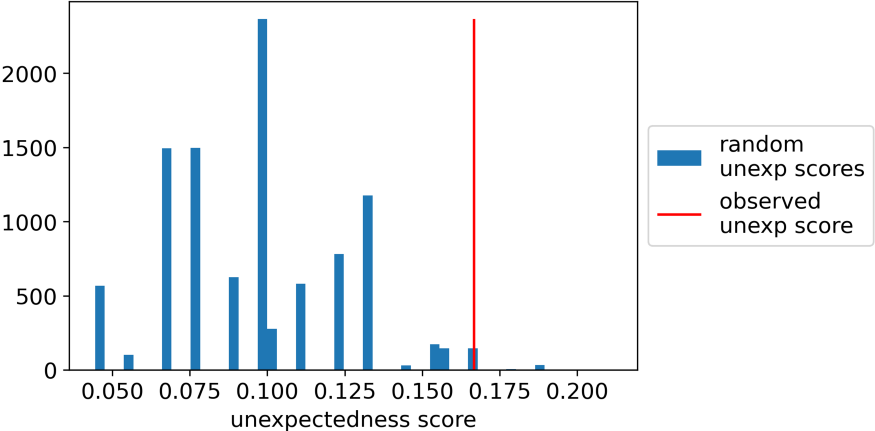

<b>Difference between two means</b>

In [3]:
product_a = np.repeat([1,2,3,4,5], 20)
product_b = np.array([1]*27+[2]*25+[3]*19+[4]*16+[5]*13)
observed_outcome = np.mean(product_a) - np.mean(product_b)

# step 1
def draw_random_outcome():
  pr_a, pr_b = np.random.permutation(np.hstack([product_a, product_b])).reshape(2,-1)
  return np.mean(pr_a) - np.mean(pr_b)

# step 2
def unexp_score(outcome):
  return np.abs(outcome)

# step 3
n_iter = 10000
random_unexp_scores = np.empty(n_iter)
for i in range(n_iter):
  random_unexp_scores[i] = unexp_score(draw_random_outcome())
# step 4
observed_unexp_score = unexp_score(observed_outcome)
# step 5
pvalue = np.sum(random_unexp_scores >= observed_unexp_score)/ n_iter


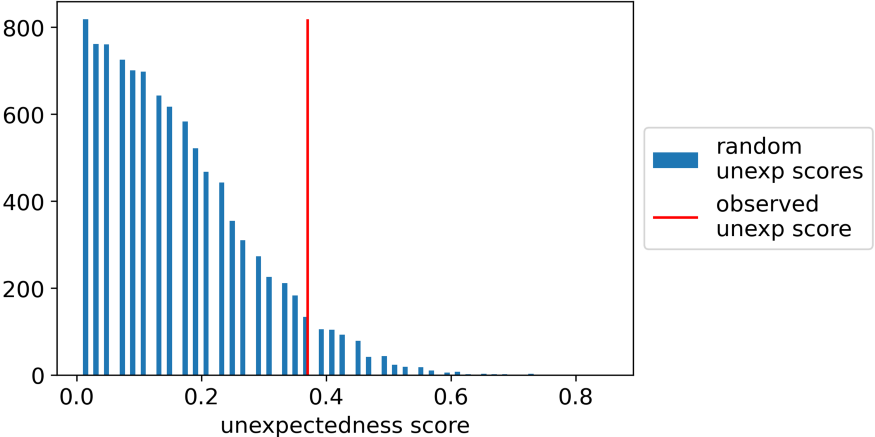

<b>Area under the ROC curve</b>

In [4]:
y_test = np.random.choice([0,1], size=100, p=[.9,.1])
proba_test = np.random.uniform(low=0, high=1, size=100)
observed_outcome = .7

# step 1
def draw_random_outcome():
  return roc_auc_score(y_test, np.random.permutation(proba_test))

# step 2
def unexp_score(outcome):
  return np.abs(outcome - .5)

# step 3
n_iter = 10000
random_unexp_scores = np.empty(n_iter)
for i in range(n_iter):
  random_unexp_scores[i] = unexp_score(draw_random_outcome())
# step 4
observed_unexp_score = unexp_score(observed_outcome)
# step 5
pvalue = np.sum(random_unexp_scores >= observed_unexp_score) / n_iter


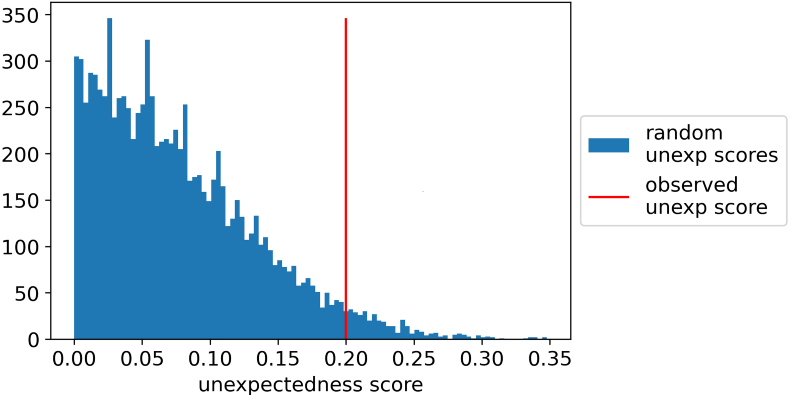